### Librerias Necesarias

In [134]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

# configuracion diagrama de outliers
flp = dict(marker="o",
           markerfacecolor="red",
           markersize=5,
           linestyle="--",
           markeredgecolor="black")

# Prueba para científico de datos

## Parte 1 - Cargar datos y estadísticas básicas

En la carpeta ```Data``` encontrará un archivo llamado ```diamonds.csv```. Este archivo contiene información de 53940 diamantes. Dentro de la información disponible, está el precio, el color, el peso, etc. Puede consultar las características completas del dataset en [este enlace](https://www.kaggle.com/shivam2503/diamonds).

1. Cargue el archivo en un dataframe de pandas 
2. Use los metodos que conozca para describir las propiedades básicas de los datos. 

### 1. Lectura de datos

In [52]:
data = pd.read_csv("Data/diamonds.csv",  delimiter=",", index_col=0)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


En primer lugar se debe verificar si la matriz de datos tiene datos faltantes

In [68]:
print(data.isnull().sum())


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


Luego de esto hace un análisis de las variables dependiendo la tipología. Se empieza una revisión de las variables categóricas

In [82]:
Categorical = data.select_dtypes(include=['float64', "int64"]).columns
Categorical

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

# Variables Categóricas

## Cut 
Calidad del corte puede tomar 5 valores (Fair, Good, Very Good, Premium, Ideal), se muestra la distribución de la variable para ver su distribución. Adicional a esto se hace una codificación dummy para que los algoritmos puedan entender las variables categóricas 


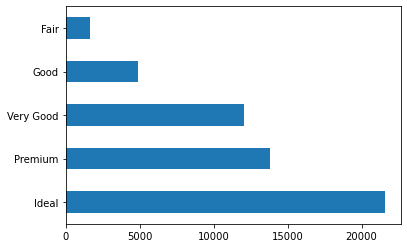

In [76]:
data["cut"].value_counts().plot.barh()
X = pd.get_dummies(data["cut"])

## Color

Calsificación del color por categorías, en donde se tiene una escala J(Peor) y  D(mejor). Se hace codificación dummy  



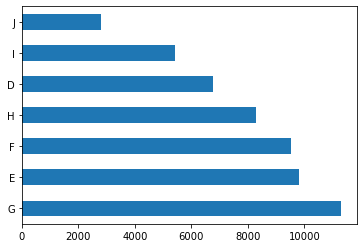

In [78]:
data["color"].value_counts().plot.barh()
X = pd.concat([X, pd.get_dummies(data["color"])], axis=1)

## Claridad 

medidad de claridad del diamante en donde la escala se entiende como I1(peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(mejor). Se binariza la variable 

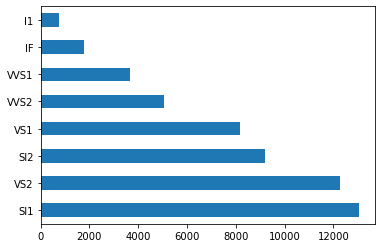

In [80]:
data["clarity"].value_counts().plot.barh()
X = pd.concat([X, pd.get_dummies(data["clarity"])], axis=1)

# variables Continuas 

## carat

Peso en quilates del diamante, definición ($1 ct = 0,2g$). En principio no se ve una distribución evidente, se lista la estadística descriptiva de la variable

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

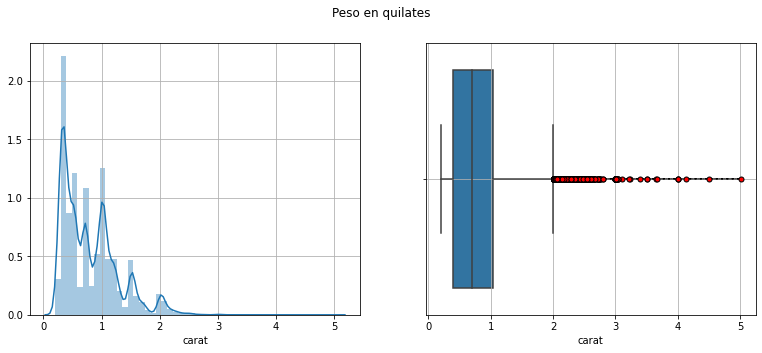

In [137]:
fig, ax =plt.subplots(1,2,figsize=(13,5))
fig.suptitle("Peso en quilates")
sns.distplot(data["carat"], ax=ax[0])
ax[0].grid(True)
sns.boxplot(x=pd.to_numeric(data["carat"]),flierprops=flp, ax = ax[1])
ax[1].grid(True)
data["carat"].describe()

X = pd.concat([X, data["carat"]], axis=1)


## depth 

porcentaje de profundidad total, que se calcula como 


$$T = \frac{2z}{x+y}$$

Puede ser una variable sintética de los datos

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

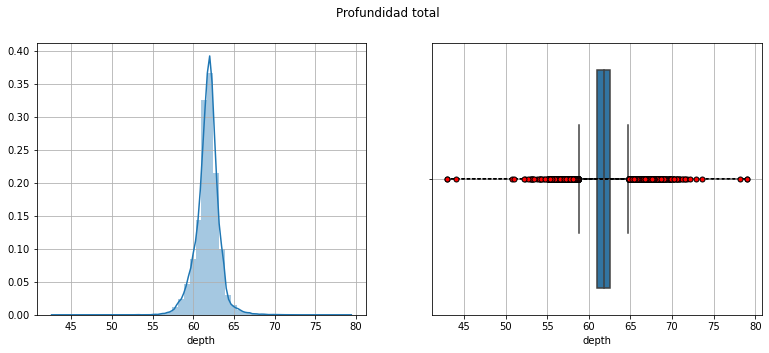

In [138]:
fig, ax =plt.subplots(1,2,figsize=(13,5))
fig.suptitle("Profundidad total")
sns.distplot(data["depth"], ax=ax[0])
ax[0].grid(True)
sns.boxplot(x=pd.to_numeric(data["depth"]),flierprops=flp, ax = ax[1])
ax[1].grid(True)
data["depth"].describe()

X = pd.concat([X, dataset["depth"]], axis=1)


## table

ancho de la parte superior del diamante en relación con el punto más ancho. Se puede evidenciar una distribución normal, salvo de valores atípicos que también se muestran.

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

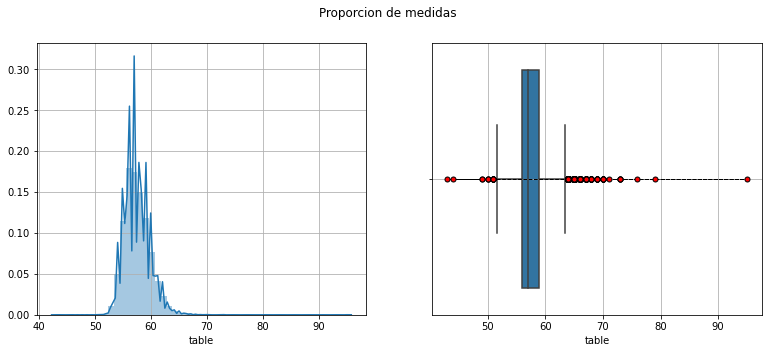

In [141]:
fig, ax =plt.subplots(1,2,figsize=(13,5))
fig.suptitle("Proporcion de medidas")
sns.distplot(data["table"], ax=ax[0])
ax[0].grid(True)
sns.boxplot(x=pd.to_numeric(data["table"]),flierprops=flp, ax = ax[1])
ax[1].grid(True)
data["table"].describe()

X = pd.concat([X, data["table"]], axis=1)


## Dimensiones

x,y,z Longitud en milimetros del diamante

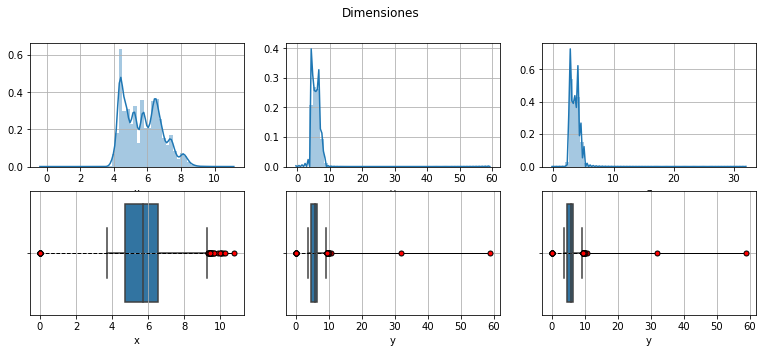

In [130]:
fig, ax =plt.subplots(2,3,figsize=(13,5))
fig.suptitle("Dimensiones")
sns.distplot(data["x"], ax=ax[0,0])
ax[0, 0].grid(True)
sns.distplot(data["y"], ax=ax[0,1])
ax[0, 1].grid(True)
sns.distplot(data["z"], ax=ax[0,2])
ax[0, 2].grid(True)
sns.boxplot(x=pd.to_numeric(data["x"]), flierprops=flp, ax=ax[1,0])
ax[1, 0].grid(True)
sns.boxplot(x=pd.to_numeric(data["y"]), flierprops=flp, ax=ax[1,1])
ax[1, 1].grid(True)
sns.boxplot(x=pd.to_numeric(data["y"]), flierprops=flp, ax=ax[1,2])
ax[1, 2].grid(True)

X = pd.concat([X, data["x"]], axis=1)
X = pd.concat([X, data["y"]], axis=1)
X = pd.concat([X, data["z"]], axis=1)


# Variable objetivo

## Precio

Precio en dolares 


count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

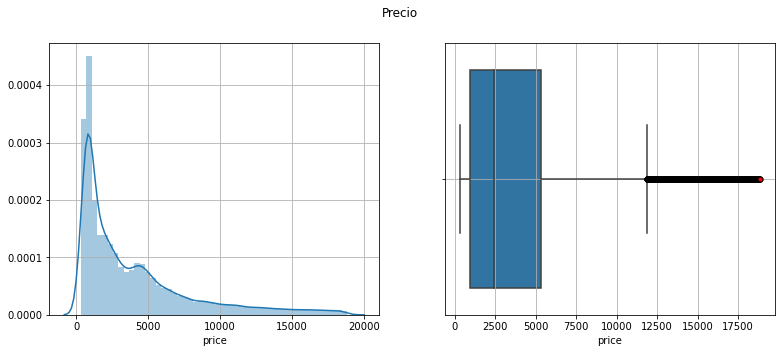

In [142]:
fig, ax =plt.subplots(1,2,figsize=(13,5))
fig.suptitle("Precio")
sns.distplot(data["price"], ax=ax[0])
ax[0].grid(True)
sns.boxplot(x=pd.to_numeric(data["price"]),flierprops=flp, ax = ax[1])
ax[1].grid(True)
data["price"].describe()

## Parte 2 - Aprendizaje no supervisado

Usted desea encontrar estructura en los datos que le han sido dados. 
1. A partir del dataframe que cargó en el primer punto, use algún algoritmo de aprendizaje no supervisado para encontrar clusters de diamantes con propiedades similares. 
2. En una celda de markdown, describa una métrica/método que se pueda utilizar para evaluar la calidad de sus clusters.
3. Varie $k$ (la cantidad de clusters) de 1 a 10 y grafique su métrica en función de $k$
4. Qué $k$ describe mejor sus datos? 

In [4]:
# Respuesta a la parte 2 




## Parte 3 - Reducción de dimensionalidad y regresión

Usted quiere predecir el precio del diamante a partir de sus características (toda columna en el dataset que no sea el precio). Sin embargo, tiene la intuición que varias columnas son redundantes - es decir - hay columnas que no aportan información nueva. 

1. Realice una reducción de dimensionalidad de los datos para evitar tener información redundante. Procure que en este nuevo espacio se explique por lo menos el 90% de la varianza de los datos.
2. En una celda de markdown, describa una métrica que se pueda utilizar para evaluar la calidad de su regresión y su habilidad para explicar los datos. 
3. Parta los datos en un conjunto de entrenamiento y otro de evaluación. 
3. Sobre este nuevo espacio, entrene un algoritmo de regresión para predecir el precio de los diamantes sobre el conjunto de entrenamiento. Evalue su algoritmo con su métrica sobre el conjunto de test. ¿Qué tan bien le va a su algoritmo? ¿Lo llevaría a producción? ¿Por qué? 


In [14]:
# Respuesta a la parte 3 




## Parte 4 - clasificación

En la carpeta ```Data``` hay un archivo llamado ```emotions.csv``` que contiene informacion sobre las ondas electromagneticas emitidas por los cerebros de 2 pacientes. Hay un total de 2549 columnas con 2132 entradas. Su trabajo es predecir el estado de ánimo de la persona (la columna label): NEUTRAL, POSITIVE o NEGATIVE a partir de las otras columnas. Puede ver una descripción extensa del dataset [aquí](https://www.kaggle.com/birdy654/eeg-brainwave-dataset-feeling-emotions). 

Implemente el pipeline que considere necesario para llevar a cabo esta tarea. Es libre de escoger las herramientas y los métodos de clasificación que desee siempre y cuando cumpla lo siguiente:

1. Implemente por lo menos 2 algoritmos de clasificación. 
2. Grafique la matriz de confusión y las curvas de precisión y cobertura para cada algoritmo. 

Compare los resultados de sus clasificadores. 

3. ¿Cuál algoritmo es mejor? 
4. ¿Considera que el mejor algoritmo es suficiente para entrar a producción? ¿Por qué? ¿Por qué no? 


In [16]:
# Respuesta a la parte 4



## Parte 5 - Despliegue

Despliegue el mejor clasificador de la etapa anterior en un endpoint. El endpoint debe procesar el objeto JSON del *body* de un POST request. El formato del objeto JSON es el siguiente:

```
{"input":[val1,val2,val3, ... ,val2548]}

```
El orden de los valores corresponde al orden de las columnas del archivo `emotions.csv`. La lista tiene 2548 valores que corresponden a los 2548 que su clasificador debe tomar como input. 

El endpoint debe retornar un json de la siguiente forma si la petición fue exitosa: 

```
{"output":"clasfOutput"}
```

Donde "clasfOutput" corresponde a la predicción del clasificador (NEUTRAL, POSITIVE o NEGATIVE).

In [2]:
# Respuesta a la parte 5 (url del endpoint)


